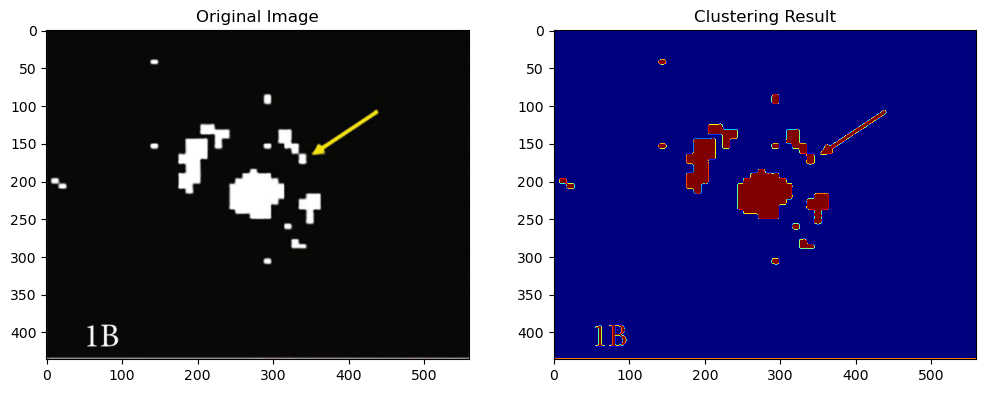

Unique labels after clustering: [0 1]
Similarity Index between Tissue 1 and Tissue 2: 87.76885490726019
Cluster 0, Region Area: 233784.0, Eccentricity: 0.628232402714413, BBox: (0, 0, 435, 560)
Cluster 0, Region Area: 81.0, Eccentricity: 0.6757302804619293, BBox: (392, 81, 403, 89)
Cluster 0, Region Area: 112.0, Eccentricity: 0.6253527642854851, BBox: (405, 81, 418, 91)
Cluster 1, Region Area: 429.0, Eccentricity: 1.0, BBox: (0, 0, 429, 1)
Cluster 1, Region Area: 60.0, Eccentricity: 0.7453324281515711, BBox: (40, 138, 47, 149)
Cluster 1, Region Area: 121.0, Eccentricity: 0.6430665953529009, BBox: (86, 288, 99, 298)
Cluster 1, Region Area: 595.0, Eccentricity: 0.9977893030547251, BBox: (107, 352, 166, 440)
Cluster 1, Region Area: 621.0, Eccentricity: 0.8228292262533247, BBox: (125, 204, 158, 243)
Cluster 1, Region Area: 658.0, Eccentricity: 0.9566406816404273, BBox: (132, 307, 179, 345)
Cluster 1, Region Area: 1906.0, Eccentricity: 0.9086056687169973, BBox: (144, 175, 218, 214)
Cluster 

In [1]:
import cv2
import numpy as np
from skimage.color import rgb2lab
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from skimage.measure import label, regionprops

# Function to calculate mean color value for a given label
def calculate_mean_color_from_label(image, labels, label):
    mask = labels == label
    return np.mean(image[mask], axis=0)

# Function to calculate similarity index
def calculate_similarity(mean_color1, mean_color2):
    similarity = np.linalg.norm(mean_color1 - mean_color2)
    return similarity

# Function to analyze clusters
def analyze_clusters(labels, n_clusters):
    for i in range(n_clusters):
        cluster_mask = labels == i
        labeled_cluster = label(cluster_mask)

        # Analyze properties of each region in the cluster
        for region in regionprops(labeled_cluster):
            # Example properties: Area, Eccentricity, Bounding box
            area = region.area
            eccentricity = region.eccentricity
            bbox = region.bbox
            print(f"Cluster {i}, Region Area: {area}, Eccentricity: {eccentricity}, BBox: {bbox}")

# Load the image
image_path = '2.png'
image = cv2.imread(image_path)

if image is None:
    print(f"Error: Image at {image_path} not found or could not be read.")
    exit()

# Convert the image from BGR to RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Convert the image to CIELAB color space
lab_image = rgb2lab(image)

# Reshape the image into a 2D array of pixels
pixels = lab_image.reshape((-1, 3))

# Perform k-means clustering
kmeans = KMeans(n_clusters=2, random_state=0, n_init=50)
labels = kmeans.fit_predict(pixels)

# Reshape the labels
labels = labels.reshape(lab_image.shape[:2])

# Visualize the original image and clustering result
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(image)
ax[0].set_title('Original Image')
ax[1].imshow(labels, cmap='jet')
ax[1].set_title('Clustering Result')
plt.show()

# Check the number of unique labels
unique_labels = np.unique(labels)
print(f"Unique labels after clustering: {unique_labels}")

if len(unique_labels) != 2:
    print("Error: k-means did not produce two distinct regions.")
    exit()

# Calculate mean color values for each cluster
mean_color_tissue1 = calculate_mean_color_from_label(lab_image, labels, unique_labels[0])
mean_color_tissue2 = calculate_mean_color_from_label(lab_image, labels, unique_labels[1])

# Calculate similarity index
similarity_index = calculate_similarity(mean_color_tissue1, mean_color_tissue2)

# Print the similarity index
print("Similarity Index between Tissue 1 and Tissue 2:", similarity_index)

# Analyze clusters for homogeneity/heterogeneity
analyze_clusters(labels, len(unique_labels))


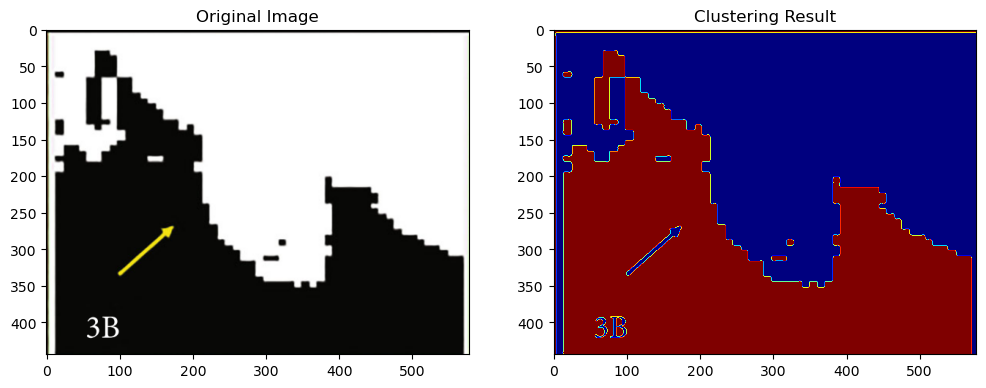

Unique labels after clustering: [0 1]
Similarity Index between Tissue 1 and Tissue 2: 95.72138674518716
Cluster 0, Region Area: 1152.0, Eccentricity: 0.9999954788534673, BBox: (0, 0, 2, 576)
Cluster 0, Region Area: 132531.0, Eccentricity: 0.8210177646093554, BBox: (5, 2, 444, 578)
Cluster 0, Region Area: 149.0, Eccentricity: 0.9416545639867057, BBox: (173, 138, 181, 160)
Cluster 0, Region Area: 557.0, Eccentricity: 0.9976033307276609, BBox: (269, 99, 337, 174)
Cluster 0, Region Area: 275.0, Eccentricity: 0.7314914093819538, BBox: (393, 77, 422, 99)
Cluster 0, Region Area: 153.0, Eccentricity: 0.8777246820552809, BBox: (394, 56, 422, 73)
Cluster 1, Region Area: 3052.0, Eccentricity: 0.8870152801595373, BBox: (0, 0, 444, 578)
Cluster 1, Region Area: 118040.0, Eccentricity: 0.869706558577536, BBox: (29, 12, 444, 571)
Cluster 1, Region Area: 85.0, Eccentricity: 0.7978952548423874, BBox: (58, 12, 66, 25)
Cluster 1, Region Area: 234.0, Eccentricity: 0.8484787496152753, BBox: (123, 12, 145, 2

In [2]:
import cv2
import numpy as np
from skimage.color import rgb2lab
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from skimage.measure import label, regionprops

# Function to calculate mean color value for a given label
def calculate_mean_color_from_label(image, labels, label):
    mask = labels == label
    return np.mean(image[mask], axis=0)

# Function to calculate similarity index
def calculate_similarity(mean_color1, mean_color2):
    similarity = np.linalg.norm(mean_color1 - mean_color2)
    return similarity

# Function to analyze clusters
def analyze_clusters(labels, n_clusters):
    for i in range(n_clusters):
        cluster_mask = labels == i
        labeled_cluster = label(cluster_mask)

        # Analyze properties of each region in the cluster
        for region in regionprops(labeled_cluster):
            # Example properties: Area, Eccentricity, Bounding box
            area = region.area
            eccentricity = region.eccentricity
            bbox = region.bbox
            print(f"Cluster {i}, Region Area: {area}, Eccentricity: {eccentricity}, BBox: {bbox}")

# Load the image
image_path = '1.png'
image = cv2.imread(image_path)

if image is None:
    print(f"Error: Image at {image_path} not found or could not be read.")
    exit()

# Convert the image from BGR to RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Convert the image to CIELAB color space
lab_image = rgb2lab(image)

# Reshape the image into a 2D array of pixels
pixels = lab_image.reshape((-1, 3))

# Perform k-means clustering
kmeans = KMeans(n_clusters=2, random_state=0, n_init=50)
labels = kmeans.fit_predict(pixels)

# Reshape the labels
labels = labels.reshape(lab_image.shape[:2])

# Visualize the original image and clustering result
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(image)
ax[0].set_title('Original Image')
ax[1].imshow(labels, cmap='jet')
ax[1].set_title('Clustering Result')
plt.show()

# Check the number of unique labels
unique_labels = np.unique(labels)
print(f"Unique labels after clustering: {unique_labels}")

if len(unique_labels) != 2:
    print("Error: k-means did not produce two distinct regions.")
    exit()

# Calculate mean color values for each cluster
mean_color_tissue1 = calculate_mean_color_from_label(lab_image, labels, unique_labels[0])
mean_color_tissue2 = calculate_mean_color_from_label(lab_image, labels, unique_labels[1])

# Calculate similarity index
similarity_index = calculate_similarity(mean_color_tissue1, mean_color_tissue2)

# Print the similarity index
print("Similarity Index between Tissue 1 and Tissue 2:", similarity_index)

# Analyze clusters for homogeneity/heterogeneity
analyze_clusters(labels, len(unique_labels))


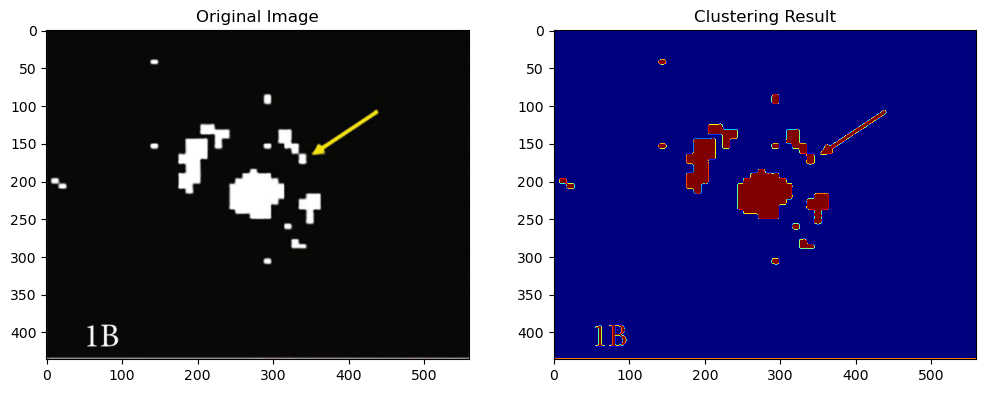

Unique labels after clustering: [0 1]
Similarity Index between Tissue 1 and Tissue 2: 87.76885490726019


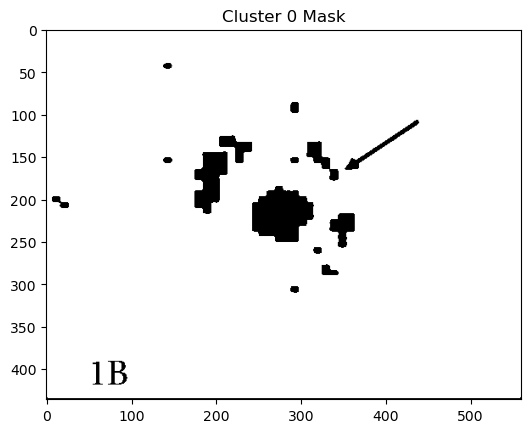

Cluster 0, Region Area: 233784.0, Eccentricity: 0.628232402714413, BBox: (0, 0, 435, 560)
Cluster 0, Region Area: 81.0, Eccentricity: 0.6757302804619293, BBox: (392, 81, 403, 89)
Cluster 0, Region Area: 112.0, Eccentricity: 0.6253527642854851, BBox: (405, 81, 418, 91)


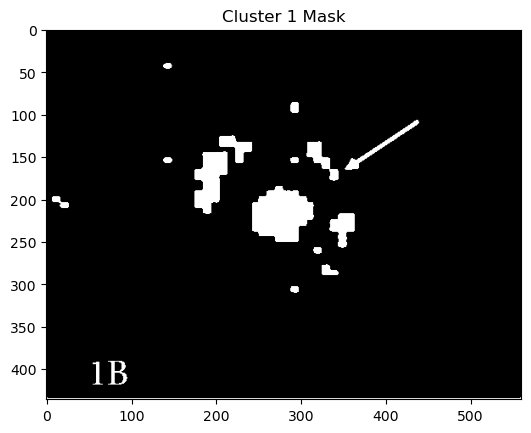

Cluster 1, Region Area: 429.0, Eccentricity: 1.0, BBox: (0, 0, 429, 1)
Cluster 1, Region Area: 60.0, Eccentricity: 0.7453324281515711, BBox: (40, 138, 47, 149)
Cluster 1, Region Area: 121.0, Eccentricity: 0.6430665953529009, BBox: (86, 288, 99, 298)
Cluster 1, Region Area: 595.0, Eccentricity: 0.9977893030547251, BBox: (107, 352, 166, 440)
Cluster 1, Region Area: 621.0, Eccentricity: 0.8228292262533247, BBox: (125, 204, 158, 243)
Cluster 1, Region Area: 658.0, Eccentricity: 0.9566406816404273, BBox: (132, 307, 179, 345)
Cluster 1, Region Area: 1906.0, Eccentricity: 0.9086056687169973, BBox: (144, 175, 218, 214)
Cluster 1, Region Area: 65.0, Eccentricity: 0.7518094115561124, BBox: (151, 138, 158, 149)
Cluster 1, Region Area: 64.0, Eccentricity: 0.7079198422699708, BBox: (151, 288, 158, 298)
Cluster 1, Region Area: 3494.0, Eccentricity: 0.5137651613763394, BBox: (185, 243, 251, 316)
Cluster 1, Region Area: 139.0, Eccentricity: 0.9398944214435182, BBox: (197, 7, 211, 27)
Cluster 1, Region

In [3]:
import cv2
import numpy as np
from skimage.color import rgb2lab
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from skimage.measure import label, regionprops

# Function to calculate mean color value for a given label
def calculate_mean_color_from_label(image, labels, label):
    mask = labels == label
    return np.mean(image[mask], axis=0)

# Function to calculate similarity index
def calculate_similarity(mean_color1, mean_color2):
    similarity = np.linalg.norm(mean_color1 - mean_color2)
    return similarity

# Function to analyze clusters
def analyze_clusters(labels, n_clusters, lab_image):
    for i in range(n_clusters):
        cluster_mask = labels == i
        labeled_cluster = label(cluster_mask)

        # Displaying each cluster mask
        plt.figure()
        plt.imshow(cluster_mask, cmap='gray')
        plt.title(f'Cluster {i} Mask')
        plt.show()

        # Analyze properties of each region in the cluster
        for region in regionprops(labeled_cluster):
            area = region.area
            eccentricity = region.eccentricity
            bbox = region.bbox
            print(f"Cluster {i}, Region Area: {area}, Eccentricity: {eccentricity}, BBox: {bbox}")

            # Optional: Display each region
            # minr, minc, maxr, maxc = bbox
            # region_image = lab_image[minr:maxr, minc:maxc]
            # plt.figure()
            # plt.imshow(region_image)
            # plt.title(f'Cluster {i}, Region in BBox {bbox}')
            # plt.show()

# Load the image
image_path = '2.png'
image = cv2.imread(image_path)

if image is None:
    print(f"Error: Image at {image_path} not found or could not be read.")
    exit()

# Convert the image from BGR to RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Convert the image to CIELAB color space
lab_image = rgb2lab(image)

# Reshape the image into a 2D array of pixels
pixels = lab_image.reshape((-1, 3))

# Perform k-means clustering
kmeans = KMeans(n_clusters=2, random_state=0, n_init=50)
labels = kmeans.fit_predict(pixels)

# Reshape the labels
labels = labels.reshape(lab_image.shape[:2])

# Visualize the original image and clustering result
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(image)
ax[0].set_title('Original Image')
ax[1].imshow(labels, cmap='jet')
ax[1].set_title('Clustering Result')
plt.show()

# Check the number of unique labels
unique_labels = np.unique(labels)
print(f"Unique labels after clustering: {unique_labels}")

if len(unique_labels) != 2:
    print("Error: k-means did not produce two distinct regions.")
    exit()

# Calculate mean color values for each cluster
mean_color_tissue1 = calculate_mean_color_from_label(lab_image, labels, unique_labels[0])
mean_color_tissue2 = calculate_mean_color_from_label(lab_image, labels, unique_labels[1])

# Calculate similarity index
similarity_index = calculate_similarity(mean_color_tissue1, mean_color_tissue2)
print("Similarity Index between Tissue 1 and Tissue 2:", similarity_index)

# Analyze clusters for homogeneity/heterogeneity
analyze_clusters(labels, len(unique_labels), lab_image)


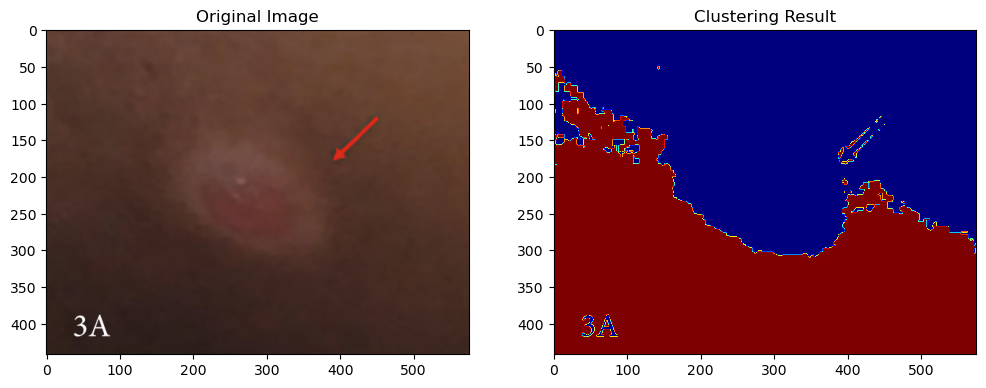

Unique labels after clustering: [0 1]
Similarity Index between Tissue 1 and Tissue 2: 13.538827718669522


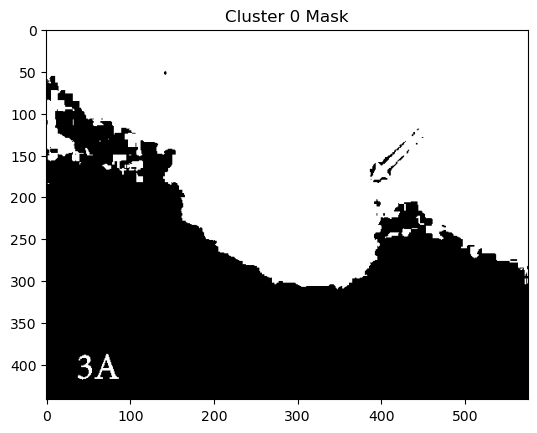

Cluster 0, Region Area: 130732.0, Eccentricity: 0.8575596871598834, BBox: (1, 0, 311, 576)
Cluster 0, Region Area: 7.0, Eccentricity: 1.0, BBox: (108, 32, 115, 33)
Cluster 0, Region Area: 1.0, Eccentricity: 0, BBox: (131, 74, 132, 75)
Cluster 0, Region Area: 2.0, Eccentricity: 1.0, BBox: (133, 64, 135, 65)
Cluster 0, Region Area: 32.0, Eccentricity: 0.9227217461397782, BBox: (142, 47, 151, 56)
Cluster 0, Region Area: 187.0, Eccentricity: 0.7216519255614545, BBox: (150, 79, 174, 96)
Cluster 0, Region Area: 3.0, Eccentricity: 1.0, BBox: (150, 99, 151, 102)
Cluster 0, Region Area: 160.0, Eccentricity: 0.8289820073517647, BBox: (157, 97, 170, 116)
Cluster 0, Region Area: 4.0, Eccentricity: 0.9128709291752769, BBox: (159, 40, 162, 42)
Cluster 0, Region Area: 48.0, Eccentricity: 0.8448334989498361, BBox: (161, 67, 168, 78)
Cluster 0, Region Area: 8.0, Eccentricity: 0.8944271909999159, BBox: (162, 94, 166, 96)
Cluster 0, Region Area: 62.0, Eccentricity: 0.6332199267781191, BBox: (172, 108, 18

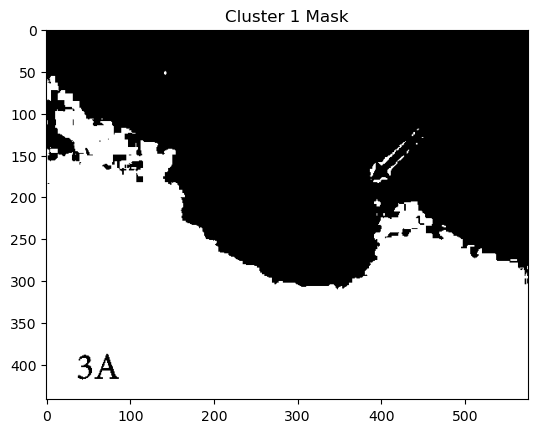

Cluster 1, Region Area: 686.0, Eccentricity: 0.9999982240353502, BBox: (0, 0, 2, 576)
Cluster 1, Region Area: 8.0, Eccentricity: 1.0, BBox: (43, 0, 51, 1)
Cluster 1, Region Area: 11.0, Eccentricity: 0.7559289460184544, BBox: (50, 141, 55, 144)
Cluster 1, Region Area: 269.0, Eccentricity: 0.8775715410401792, BBox: (55, 0, 89, 15)
Cluster 1, Region Area: 121243.0, Eccentricity: 0.909387616658693, BBox: (73, 0, 442, 576)
Cluster 1, Region Area: 2.0, Eccentricity: 1.0, BBox: (107, 66, 108, 68)
Cluster 1, Region Area: 4.0, Eccentricity: 0.9241763718304448, BBox: (119, 443, 121, 446)
Cluster 1, Region Area: 11.0, Eccentricity: 0.933514148225879, BBox: (123, 437, 128, 441)
Cluster 1, Region Area: 2.0, Eccentricity: 1.0, BBox: (129, 449, 130, 451)
Cluster 1, Region Area: 111.0, Eccentricity: 0.9957571012537427, BBox: (134, 397, 163, 430)
Cluster 1, Region Area: 4.0, Eccentricity: 0.0, BBox: (136, 442, 138, 444)
Cluster 1, Region Area: 1.0, Eccentricity: 0, BBox: (141, 5, 142, 6)
Cluster 1, Reg

In [5]:
import cv2
import numpy as np
from skimage.color import rgb2lab
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from skimage.measure import label, regionprops

# Function to calculate mean color value for a given label
def calculate_mean_color_from_label(image, labels, label):
    mask = labels == label
    return np.mean(image[mask], axis=0)

# Function to calculate similarity index
def calculate_similarity(mean_color1, mean_color2):
    similarity = np.linalg.norm(mean_color1 - mean_color2)
    return similarity

# Function to analyze clusters
def analyze_clusters(labels, n_clusters, lab_image):
    for i in range(n_clusters):
        cluster_mask = labels == i
        labeled_cluster = label(cluster_mask)

        # Displaying each cluster mask
        plt.figure()
        plt.imshow(cluster_mask, cmap='gray')
        plt.title(f'Cluster {i} Mask')
        plt.show()

        # Analyze properties of each region in the cluster
        for region in regionprops(labeled_cluster):
            area = region.area
            eccentricity = region.eccentricity
            bbox = region.bbox
            print(f"Cluster {i}, Region Area: {area}, Eccentricity: {eccentricity}, BBox: {bbox}")

            # Optional: Display each region
            # minr, minc, maxr, maxc = bbox
            # region_image = lab_image[minr:maxr, minc:maxc]
            # plt.figure()
            # plt.imshow(region_image)
            # plt.title(f'Cluster {i}, Region in BBox {bbox}')
            # plt.show()

# Load the image
image_path = '3.png'
image = cv2.imread(image_path)

if image is None:
    print(f"Error: Image at {image_path} not found or could not be read.")
    exit()

# Convert the image from BGR to RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Convert the image to CIELAB color space
lab_image = rgb2lab(image)

# Reshape the image into a 2D array of pixels
pixels = lab_image.reshape((-1, 3))

# Perform k-means clustering
kmeans = KMeans(n_clusters=2, random_state=0, n_init=50)
labels = kmeans.fit_predict(pixels)

# Reshape the labels
labels = labels.reshape(lab_image.shape[:2])

# Visualize the original image and clustering result
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(image)
ax[0].set_title('Original Image')
ax[1].imshow(labels, cmap='jet')
ax[1].set_title('Clustering Result')
plt.show()

# Check the number of unique labels
unique_labels = np.unique(labels)
print(f"Unique labels after clustering: {unique_labels}")

if len(unique_labels) != 2:
    print("Error: k-means did not produce two distinct regions.")
    exit()

# Calculate mean color values for each cluster
mean_color_tissue1 = calculate_mean_color_from_label(lab_image, labels, unique_labels[0])
mean_color_tissue2 = calculate_mean_color_from_label(lab_image, labels, unique_labels[1])

# Calculate similarity index
similarity_index = calculate_similarity(mean_color_tissue1, mean_color_tissue2)
print("Similarity Index between Tissue 1 and Tissue 2:", similarity_index)

# Analyze clusters for homogeneity/heterogeneity
analyze_clusters(labels, len(unique_labels), lab_image)
